In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")
df.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [3]:
df.shape

(42000, 785)

In [4]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [5]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

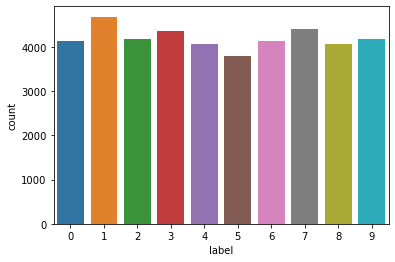

In [6]:
sns.countplot(data = df,x=y)

In [7]:
x.sample(1)

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
8251       0       0       0       0       0       0       0       0       0   

      pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
8251       0  ...         0         0         0         0         0         0   

      pixel780  pixel781  pixel782  pixel783  
8251         0         0         0         0  

[1 rows x 784 columns]

In [8]:
plt.imshow(x.iloc[244,:].values.reshape(28,28))
plt.title(f"number is  {y[244]}")

Text(0.5, 1.0, 'number is  5')

In [9]:
x.sample()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
11009       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
11009       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
11009         0         0         0         0         0  

[1 rows x 784 columns]

In [10]:
plt.imshow(x.iloc[5,:].values.reshape(28,28))

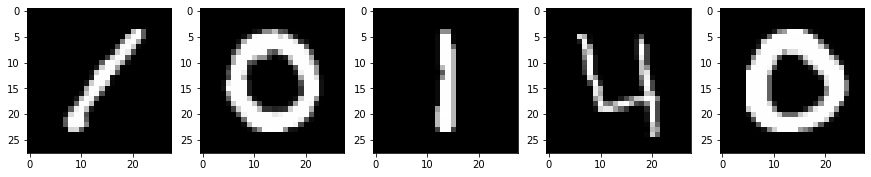

In [11]:
plt.figure(figsize=(15,10))
for i in range(5):
    plt.subplot(2,5,i+1)
    plt.imshow(x.iloc[i,:].values.reshape(28,28),cmap='gray')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier()

In [15]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [16]:
knn.predict(x_test)

array([3, 6, 9, ..., 1, 6, 5], dtype=int64)

In [17]:
y_pred = knn.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9657142857142857

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
std = StandardScaler()
x_train_trf = std.fit_transform(x_train)
x_test_trf = std.transform(x_test)

In [21]:
x_train_trf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components=100)

In [24]:
x_train_pca = pca.fit_transform(x_train_trf)
x_test_pca = pca.transform(x_test)

In [25]:
x_train_pca

array([[19.68741513,  3.57869177, -7.03424271, ..., -0.60839129,
         1.77258253, -1.14467302],
       [-7.75963333, -4.31416115,  2.9121362 , ..., -0.38972118,
        -0.86236568, -0.05681786],
       [-3.90003679,  4.91832396, -4.63369926, ..., -0.1844284 ,
         0.79145525, -0.24835575],
       ...,
       [-5.02495002,  5.91908   , -3.38622072, ...,  1.00666829,
         0.10799605, -0.5726693 ],
       [11.76971798, -6.18557809, -4.63846368, ..., -0.04286207,
        -0.54204481, -0.3478557 ],
       [-3.85178028,  4.87844006, -3.05784185, ...,  1.34189545,
         0.49525231,  0.60610231]])

In [26]:
x_train_pca.shape

(29400, 100)

In [27]:
knn_pca = KNeighborsClassifier()
knn_pca.fit(x_train_pca,y_train)

KNeighborsClassifier()

In [28]:
y_pred_pca = knn_pca.predict(x_test_pca)

In [29]:
accuracy_score(y_test,y_pred_pca)

0.7665873015873016

In [30]:
for i in range(1,785):
    pca = PCA(n_components=i)
    x_train_pca = pca.fit_transform(x_train_trf)
    x_test_pca = pca.transform(x_test)
    knn.fit(x_train_pca,y_train)
    y_pred_pca = knn.predict(x_test_pca)
    print(f"Iteration : {i} {accuracy_score(y_test,y_pred_pca)}")


Iteration : 1 0.18611111111111112
Iteration : 2 0.1353174603174603
Iteration : 3 0.2311111111111111
Iteration : 4 0.25936507936507935
Iteration : 5 0.36317460317460315
Iteration : 6 0.4018253968253968
Iteration : 7 0.43087301587301585
Iteration : 8 0.4714285714285714
Iteration : 9 0.4726984126984127
Iteration : 10 0.4633333333333333
Iteration : 11 0.4666666666666667
Iteration : 12 0.4823015873015873


KeyboardInterrupt: 

In [38]:
pca_dim = PCA(n_components=3)
x_train_pca = pca_dim.fit_transform(x_train_trf)
x_test_pca = pca_dim.transform(x_test)
x_train_pca.shape

(29400, 3)

In [39]:
!pip install plotly
import plotly.express as px
px.scatter(x_train_pca[:,0],x_train_pca[:,1])

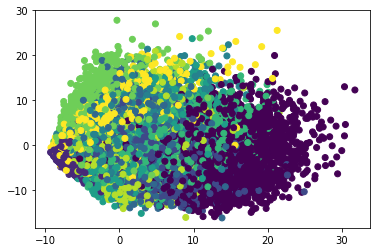

In [40]:
plt.scatter(x_train_pca[:,0],x_train_pca[:,1],c=y_train)

In [41]:
d=y_train.astype(str)

In [42]:
import plotly.express as px
px.scatter_3d(x=x_train_pca[:,0],y=x_train_pca[:,1],z=x_train_pca[:,2],color=d)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning:

invalid value encountered in sqrt



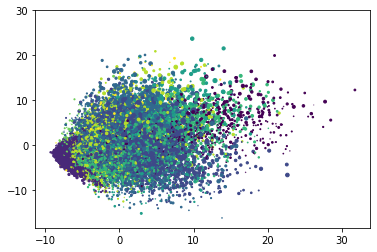

In [43]:
plt.scatter(x_train_pca[:,0],x_train_pca[:,1],x_train_pca[:,2],c=y_train)

In [44]:
pca.explained_variance_

array([40.59588171, 29.31939629, 26.70539899, 20.79061605, 18.06430752,
       15.75866105, 13.93061745, 12.52024118, 11.12694484, 10.08079465,
        9.7155175 ,  8.70331524,  8.01032029])

In [45]:
pca.explained_variance_ratio_*100

array([5.84935171, 4.22455317, 3.84790932, 2.99566411, 2.60283762,
       2.2706232 , 2.00722531, 1.80400797, 1.60325164, 1.45251466,
       1.39988286, 1.25403735, 1.15418557])

In [46]:
d = y_train.astype(str)
pca_dim = PCA()
x_train_pca = pca_dim.fit_transform(x_train_trf)
x_test_pca = pca_dim.transform(x_test)
pca_dim.explained_variance_ratio_*100


array([5.84935171e+00, 4.22455317e+00, 3.84790932e+00, 2.99566411e+00,
       2.60283768e+00, 2.27062325e+00, 2.00722706e+00, 1.80402768e+00,
       1.60330442e+00, 1.45271448e+00, 1.40019450e+00, 1.25521838e+00,
       1.15606423e+00, 1.13774951e+00, 1.07853036e+00, 1.03298491e+00,
       9.70395520e-01, 9.57399383e-01, 9.34237163e-01, 9.12905801e-01,
       8.58260664e-01, 8.33084537e-01, 8.04735721e-01, 7.70710198e-01,
       7.48672901e-01, 7.13847382e-01, 7.08900817e-01, 6.86255797e-01,
       6.51284381e-01, 6.37463674e-01, 6.28489824e-01, 6.22514458e-01,
       6.00492008e-01, 5.86809038e-01, 5.80058199e-01, 5.67056254e-01,
       5.49320588e-01, 5.35830886e-01, 5.23765424e-01, 5.10018441e-01,
       4.98834932e-01, 4.93105367e-01, 4.77954113e-01, 4.67097346e-01,
       4.62488902e-01, 4.57313741e-01, 4.54632903e-01, 4.41634541e-01,
       4.37056088e-01, 4.26388524e-01, 4.19607359e-01, 4.15478962e-01,
       4.05136934e-01, 4.01094749e-01, 3.88302168e-01, 3.85735414e-01,
      

In [47]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05849352, 0.10073905, 0.13921814, 0.16917478, 0.19520316,
       0.21790939, 0.23798164, 0.25602172, 0.27205424, 0.28657939,
       0.30057822, 0.31311859, 0.32466044])

In [48]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))